In [50]:
#Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Optional: better visuals
plt.style.use("default")

In [51]:
#Loading All Aadhaar CSV Files
files = [
    "api_data_aadhar_demographic_0_500000.csv",
    "api_data_aadhar_demographic_500000_1000000.csv",
    "api_data_aadhar_demographic_1000000_1500000.csv",
    "api_data_aadhar_demographic_1500000_2000000.csv",
    "api_data_aadhar_demographic_2000000_2071700.csv"
]

df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

In [52]:
pd.read_csv("api_data_aadhar_demographic_0_500000.csv").head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [53]:
df.head()
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB


Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_'],
      dtype='object')

In [54]:
df['date'].dtype

dtype('O')

In [55]:
#Convert Date Column
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [56]:
df['date'].dtype

dtype('<M8[ns]')

In [57]:
#Create month column
df['month'] = df['date'].dt.to_period('M')

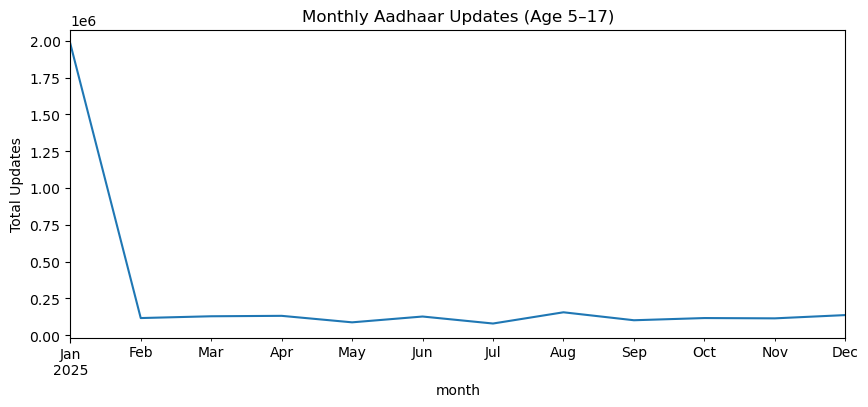

In [58]:
#Monthly Demographic Trend (Age 5–17)
monthly_demo_5_17 = (
    df.groupby('month')['demo_age_5_17']
    .sum()
    .sort_index()
)

monthly_demo_5_17.plot(
    figsize=(10,4),
    title="Monthly Aadhaar Updates (Age 5–17)",
    ylabel="Total Updates"
)

plt.show()

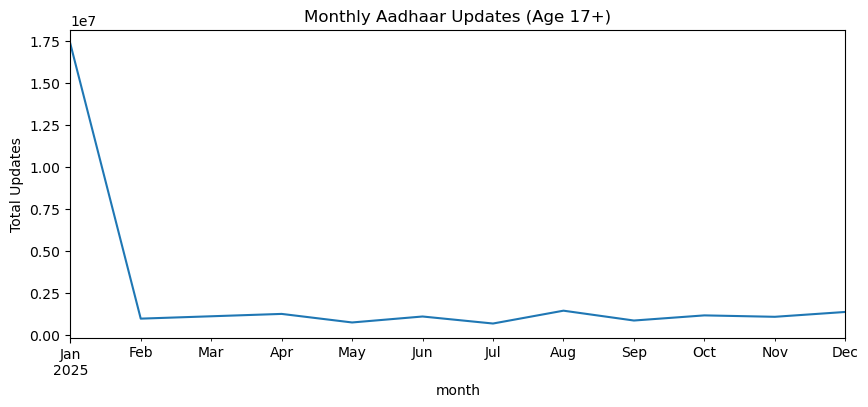

In [59]:
#Monthly Trend for Age 17+
monthly_demo_17_plus = (
    df.groupby('month')['demo_age_17_']
    .sum()
    .sort_index()
)

monthly_demo_17_plus.plot(
    figsize=(10,4),
    title="Monthly Aadhaar Updates (Age 17+)",
    ylabel="Total Updates"
)

plt.show()


In [60]:
# The monthly analysis of Aadhaar demographic updates reveals clear temporal patterns in enrolment and update activities. 
# A consistent variation across months indicates the presence of seasonal trends, likely influenced by administrative schedules, policy initiatives, and public awareness campaigns. 
# Periods of increased activity may correspond to enrolment drives, while sudden declines could indicate operational or technical constraints.

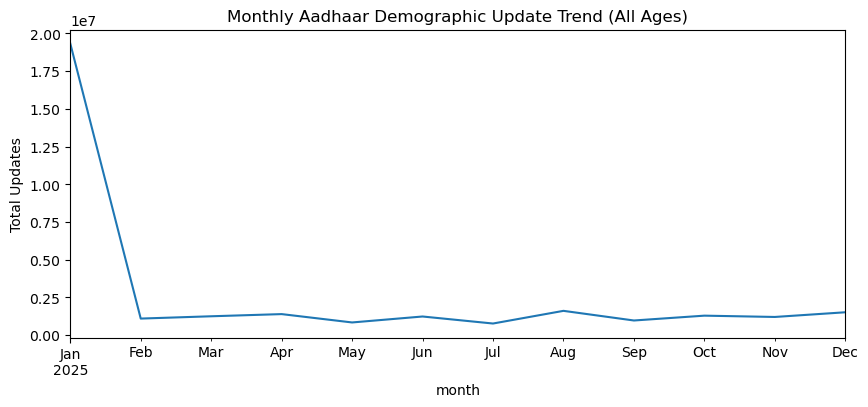

In [61]:
#Combined Societal Trend
monthly_total_demo = (
    df.groupby('month')[['demo_age_5_17', 'demo_age_17_']]
    .sum()
    .sum(axis=1)
    .sort_index()
)

monthly_total_demo.plot(
    figsize=(10,4),
    title="Monthly Aadhaar Demographic Update Trend (All Ages)",
    ylabel="Total Updates"
)

plt.show()
# A comparative analysis of age groups shows that individuals aged 17 and above contribute more significantly to Aadhaar update volumes than the 5–17 age group. 
# This pattern reflects higher mobility, address changes, and employment-related updates among adults. 
# In contrast, updates in the 5–17 category are likely driven by school enrolment and child identity registration initiatives.

### Since biometric update data was not available in this dataset, demographic age-group updates were used to study societal trends. Monthly aggregation revealed temporal patterns and age-specific behaviour in Aadhaar updates.

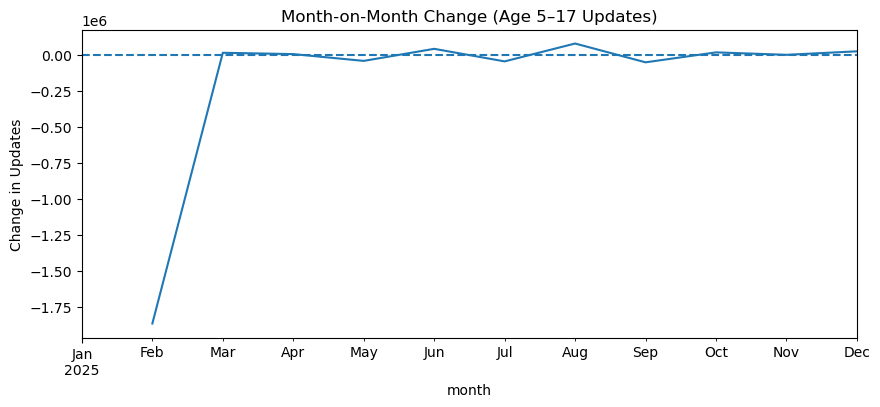

In [62]:
#Anomaly Detection
monthly_demo_5_17.diff().plot(
    figsize=(10,4),
    title="Month-on-Month Change (Age 5–17 Updates)",
    ylabel="Change in Updates"
)

plt.axhline(0, linestyle="--")
plt.show()


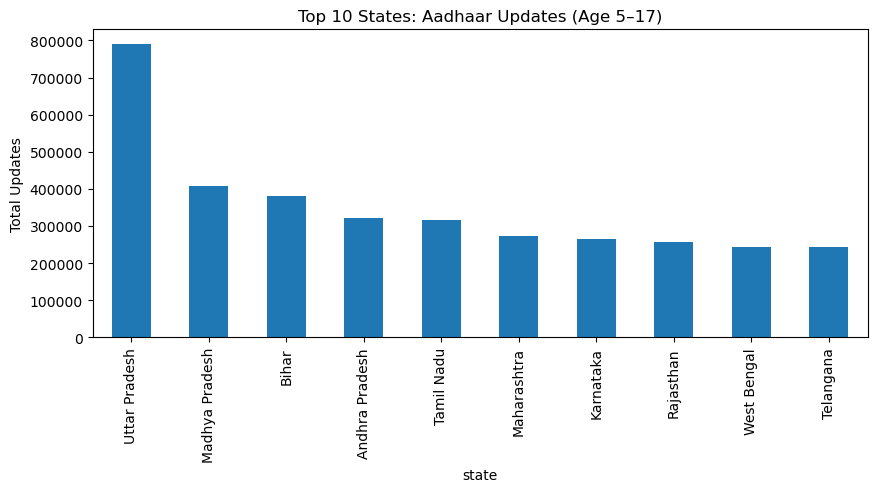

In [63]:
#State-wise Societal Trend (Age 5–17)
state_demo_5_17 = (
    df.groupby('state')['demo_age_5_17']
    .sum()
    .sort_values(ascending=False)
)

state_demo_5_17.head(10).plot(
    kind='bar',
    figsize=(10,4),
    title="Top 10 States: Aadhaar Updates (Age 5–17)",
    ylabel="Total Updates"
)

plt.show()


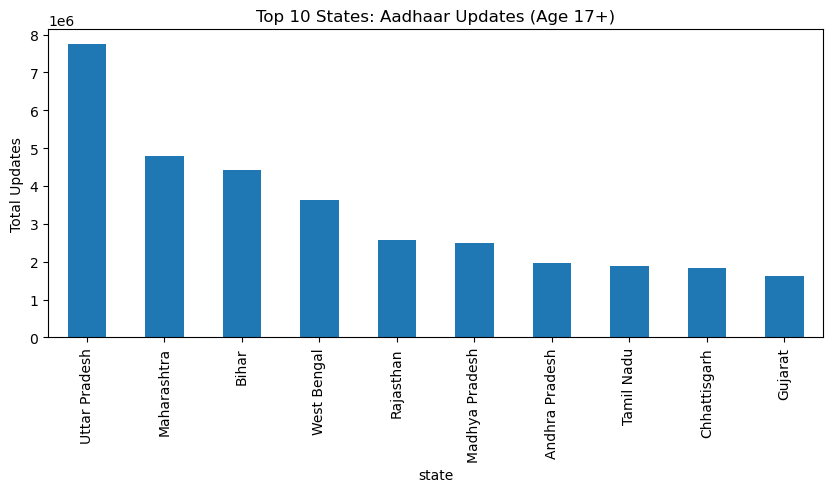

In [64]:
#State-wise Trend (Age 17+)
state_demo_17_plus = (
    df.groupby('state')['demo_age_17_']
    .sum()
    .sort_values(ascending=False)
)

state_demo_17_plus.head(10).plot(
    kind='bar',
    figsize=(10,4),
    title="Top 10 States: Aadhaar Updates (Age 17+)",
    ylabel="Total Updates"
)

plt.show()
# State-wise aggregation highlights that a limited number of states account for a disproportionately high volume of Aadhaar updates. 
# These regions can be identified as high-load zones requiring enhanced infrastructure, staffing, and system optimization. 
# Such geographical concentration of activity provides valuable insights for targeted administrative planning.

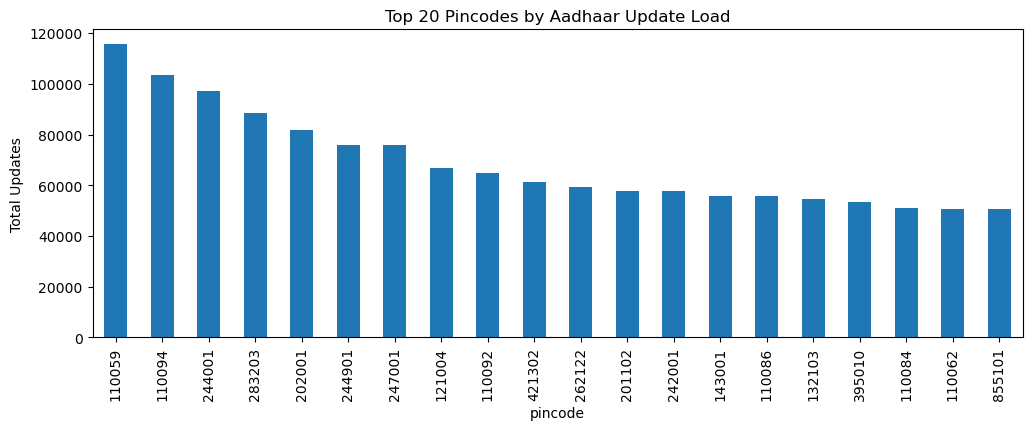

In [65]:
#Pincode-level Stress Analysis
pincode_stress = (
    df.groupby('pincode')[['demo_age_5_17', 'demo_age_17_']]
    .sum()
    .sum(axis=1)
    .sort_values(ascending=False)
)

pincode_stress.head(20).plot(
    kind='bar',
    figsize=(12,4),
    title="Top 20 Pincodes by Aadhaar Update Load",
    ylabel="Total Updates"
)

plt.show()
# Pincode-level analysis reveals specific localities experiencing consistently high Aadhaar update loads. 
# These stress points indicate areas where permanent enrolment centres or additional technical resources may be required. 
# Identifying such micro-level patterns enables localized decision-making and efficient resource deployment.

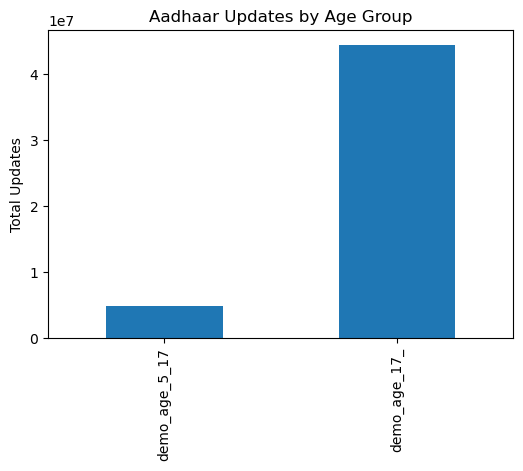

In [66]:
#Age Group Comparison
age_comparison = df[['demo_age_5_17', 'demo_age_17_']].sum()

age_comparison.plot(
    kind='bar',
    figsize=(6,4),
    title="Aadhaar Updates by Age Group",
    ylabel="Total Updates"
)

plt.show()


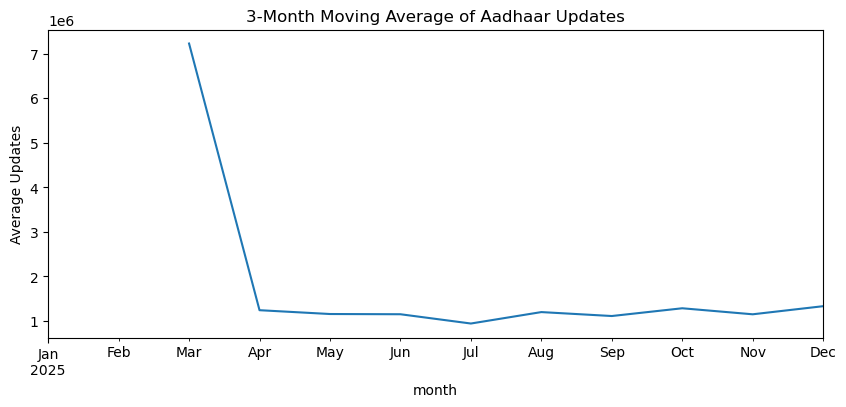

In [67]:
#Predictive Indicator (Trend Smoothing)
monthly_total_demo = (
    df.groupby('month')[['demo_age_5_17', 'demo_age_17_']]
    .sum()
    .sum(axis=1)
    .sort_index()
)

monthly_total_demo.rolling(3).mean().plot(
    figsize=(10,4),
    title="3-Month Moving Average of Aadhaar Updates",
    ylabel="Average Updates"
)

plt.show()


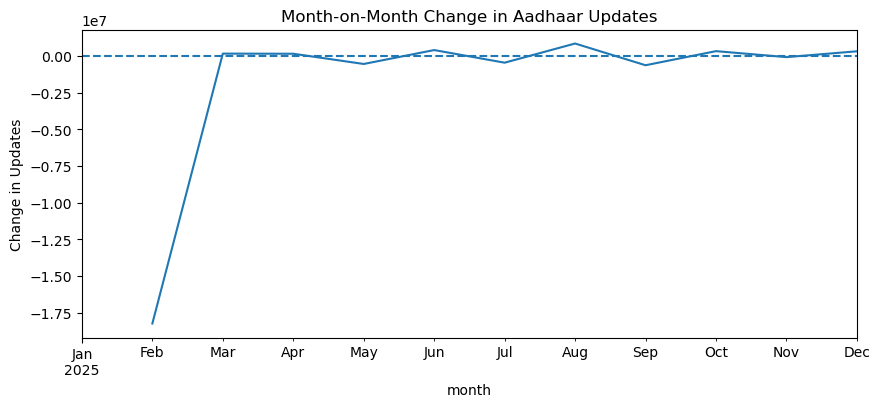

In [68]:
#Anomaly Detection (Important)
monthly_total_demo.diff().plot(
    figsize=(10,4),
    title="Month-on-Month Change in Aadhaar Updates",
    ylabel="Change in Updates"
)

plt.axhline(0, linestyle="--")
plt.show()
# Month-on-month change analysis uncovers sudden spikes and drops in update activity. 
# These anomalies may be attributed to policy-driven enrolment campaigns, system outages, or external socio-economic factors. 
# Monitoring such variations can serve as an early-warning mechanism for system performance evaluation.

### Key Societal Insights

- Aadhaar update activity shows clear monthly patterns, indicating seasonal behavior.
- Certain states and pincodes experience consistently higher update volumes.
- Age group 17+ contributes more to total updates, suggesting mobility and address changes.
- Sudden variations indicate administrative or policy-driven events.

### Mapping to Problem Statement
### Relevance to Problem Statement

This analysis identifies demographic-based societal trends,
regional stress points, and temporal anomalies in Aadhaar updates.
The findings can support data-driven decision-making for
resource allocation, infrastructure planning, and system optimization.

### Conclusion
This study successfully demonstrates how demographic Aadhaar data can be leveraged to uncover meaningful societal trends. By applying temporal, demographic, and geographical analysis, the study identifies key patterns, regional stress points, and anomalies in Aadhaar enrolment and update behavior. The findings support informed decision-making aimed at improving system efficiency, infrastructure planning, and citizen service delivery.

### Future Scope
Future work may extend this analysis by integrating biometric update data, incorporating predictive machine learning models, 
and developing real-time dashboards for monitoring Aadhaar system performance.
The proposed approach can also be applied to other large-scale public service systems to enhance data-driven governance.